<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [71]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Well...
df.index = df.Name
df.filter(like='Rosa Hunt', axis = 0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Abbott, Mrs. Stanton (Rosa Hunt)",280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # test data
y = df.Survived  # train data

In [29]:
# convert binary values to nominative variables
X = pd.get_dummies(X)

In [30]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",3,22.0,1,0,7.2500,0,1,0,0,1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.0,1,0,71.2833,1,0,1,0,0
"Heikkinen, Miss. Laina",3,26.0,0,0,7.9250,1,0,0,0,1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,0,0,0,1
"Allen, Mr. William Henry",3,35.0,0,0,8.0500,0,1,0,0,1


In [34]:
X = X.fillna({'Age': X.Age.median()})
# It's not cool as I fill na with median of age withou taking 'sex' into account

In [37]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [43]:
sklearn.set_config(print_changed_only=False)

In [45]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

[Text(0.4320188710387324, 0.975, 'Sex_male <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Died'),
 Text(0.15911091549295775, 0.925, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]\nclass = Survived'),
 Text(0.05985915492957746, 0.875, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]\nclass = Survived'),
 Text(0.045774647887323945, 0.825, 'Fare <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]\nclass = Survived'),
 Text(0.03873239436619718, 0.775, 'Age <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]\nclass = Survived'),
 Text(0.03169014084507042, 0.725, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Survived'),
 Text(0.045774647887323945, 0.725, 'Age <= 27.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]\nclass = Survived'),
 Text(0.028169014084507043, 0.675, 'Age <= 25.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]\nclass = Survived'),
 Text(0.014084507042253521, 0.625, 'Fare <= 13.75\nentropy = 0.592\ns

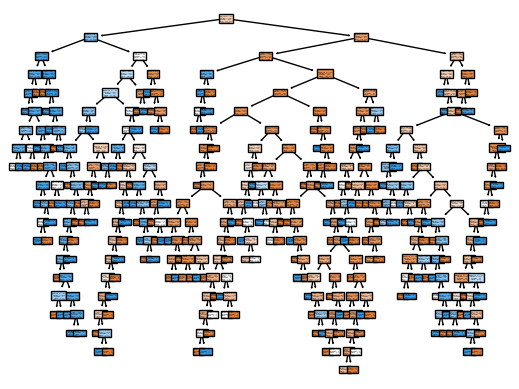

In [93]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True)

In [96]:
def draw_graphviz(graph):
    import re
    import ipywidgets as widgets
    from IPython.display import SVG, HTML
    from graphviz import Source

    graph = Source(graph)
    image = graph.pipe(format="svg")
    svg = SVG(image)
    svg_data = svg.data
    svg_data = re.sub(
        r'<svg xmlns=\"http://www\.w3\.org/2000/svg\" xmlns:xlink=\"http://www\.w3\.org/1999/xlink\" width=\"\d+pt\" height=\"\d+pt\"',
        '<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="100%" height="100%"',
        svg_data,
    )

    @widgets.interact(scale=widgets.IntSlider(min=30, max=500, step=1, value=100, description="Scale (%):", continuous_update=False))
    def _draw_svg(scale):
        return HTML('<div style="width: {width}%;">{svg}</div>'.format(width=scale, svg=svg_data))
    return _draw_svg

In [98]:
graph = tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=["Died", "Survived"], filled=True)
draw_graphviz(graph)

interactive(children=(IntSlider(value=100, continuous_update=False, description='Scale (%):', max=500, min=30)…

<function __main__.draw_graphviz.<locals>._draw_svg(scale)>

OUR DECISION TREE IS SOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO LARGE!!!
IT'S BECAUSE OF OVERFITTING (OUR MODEL TRIED IT'S BEST TO GET 100% CORRECT RESULT)

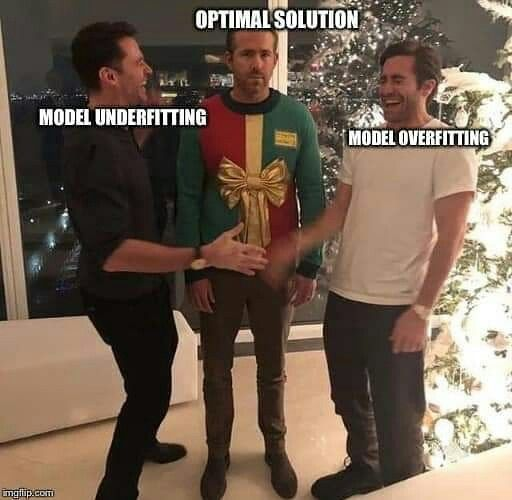

# Something like this:
**Imagine that we build 'x' and 'o' classification model.** <br>
**But we have a problem... 1 of 'o's is colse to 'x's** <br>
**So our model will build soooooo big tree to solve this problem with 100% accuracy** <br>

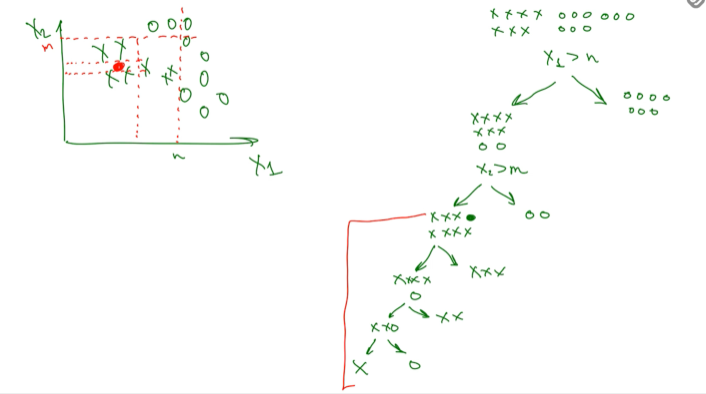

In [99]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Name,,,,,,,,,,
"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,0,1,0,0,1
"McEvoy, Mr. Michael",3,28.0,0,0,15.5000,0,1,0,1,0
"Laroche, Mr. Joseph Philippe Lemercier",2,25.0,1,2,41.5792,0,1,1,0,0
"Chronopoulos, Mr. Apostolos",3,26.0,1,0,14.4542,0,1,1,0,0
"Dahlberg, Miss. Gerda Ulrika",3,22.0,0,0,10.5167,1,0,0,0,1


In [103]:
X_train.shape

(596, 10)

In [104]:
X_test.shape

(295, 10)

In [105]:
clf.score(X, y)  # woow! 98% accuracy it's so...

0.9797979797979798

In [108]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)  # brooooo....
# overfitting moment

0.7728813559322034

In [113]:
# so we have to set limit on depth of tree:

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8203389830508474

# **D E C I S I O N______T R E E . . .**
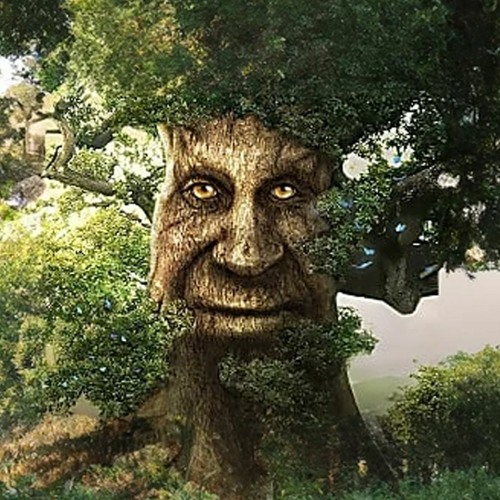